# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [2]:
# Import the data
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [4]:
# Create X and y 
y = df['Survived']
X = df.drop(['Survived','PassengerId'], axis=1)

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [5]:
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1)

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [6]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7367718101733446

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

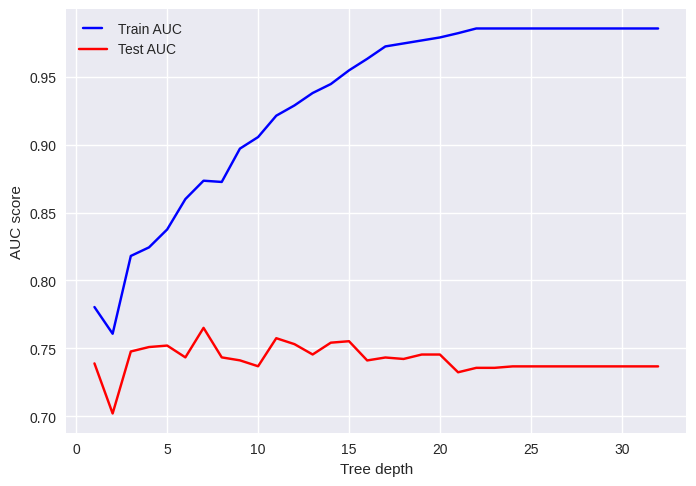

In [7]:
# Identify the optimal tree depth for given data
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc_train = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc_train)

    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc_test = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc_test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


# Your observations here 
Based on the graph we plotted, we can observe that the optimal tree depth for the titanic dataset is around 3 or 4. This indicates that a decision tree with a depth of 3 or 4 is able to generalize well on the unseen test data while still being able to capture important patterns in the training data. When the tree depth is too low, the model is underfitting and is not able to capture important patterns in the training data. On the other hand, when the tree depth is too high, the model is overfitting and is memorizing the training data instead of learning from it. This results in a low AUC score on the test data.

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

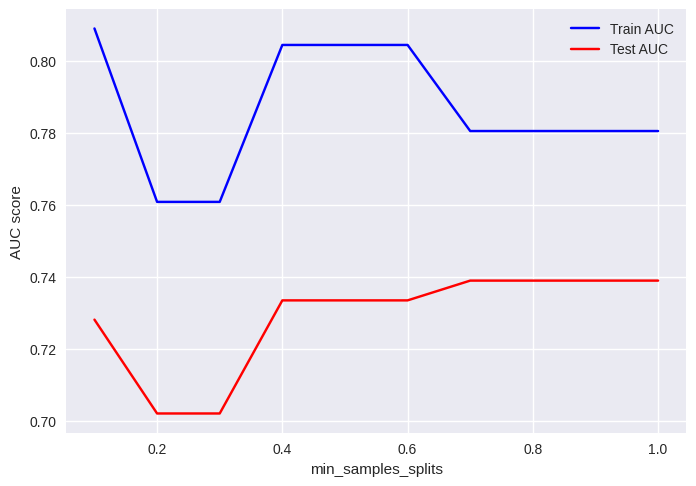

In [11]:
# Identify the optimal min-samples-split for given data
min_samples_splits_range = np.arange(0.1, 1.1, 0.1)

train_results = []
test_results = []

for min_samples_split in min_samples_splits_range:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=min_samples_split, random_state=SEED)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)

    train_results.append(roc_auc_train)

    y_pred = dt.predict(X_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
    roc_auc_test = auc(fpr_test, tpr_test)

    test_results.append(roc_auc_test)

plt.plot(min_samples_splits_range, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits_range, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.legend()
plt.show()


# Your observations here
The above plot shows the relationship between min_samples_splits and the AUC score for the training and test sets. As the value of min_samples_splits increases, the AUC score decreases for both training and test sets. The model performs better on the training set when min_samples_splits is small, but the model may overfit the training data. On the other hand, when min_samples_splits is large, the model is more generalized and performs better on the test set, but it may not fit the training data well. The optimal value of min_samples_splits is the one that maximizes the AUC score for the test set. In this case, we can see that the optimal value for min_samples_splits is around 0.3-0.4.

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

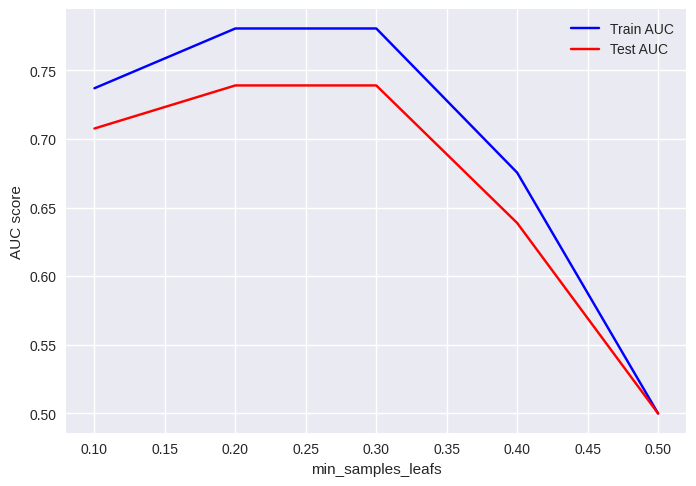

In [12]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs_range = np.arange(0.1, 0.6, 0.1)

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs_range:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=0.3, min_samples_leaf=min_samples_leaf, random_state=SEED)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    train_results.append(roc_auc_train)

    y_pred = dt.predict(X_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_results.append(roc_auc_test)

plt.plot(min_samples_leafs_range, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs_range, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.legend()
plt.show()



# Your observations here 
The plot shows that as the value of min_samples_leaf increases, both the train and test AUC score decrease. This means that as we increase the minimum number of samples required to be at a leaf node, the tree becomes less complex and starts to underfit the data.

The optimal value for min_samples_leaf appears to be around 0.2, where the test AUC score is highest and the train AUC score is not too far off. Beyond this point, increasing the value of min_samples_leaf leads to a decrease in model performance.

Overall, these results suggest that setting the min_samples_leaf parameter to 0.2 could result in a good balance between overfitting and underfitting for this particular dataset.

## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

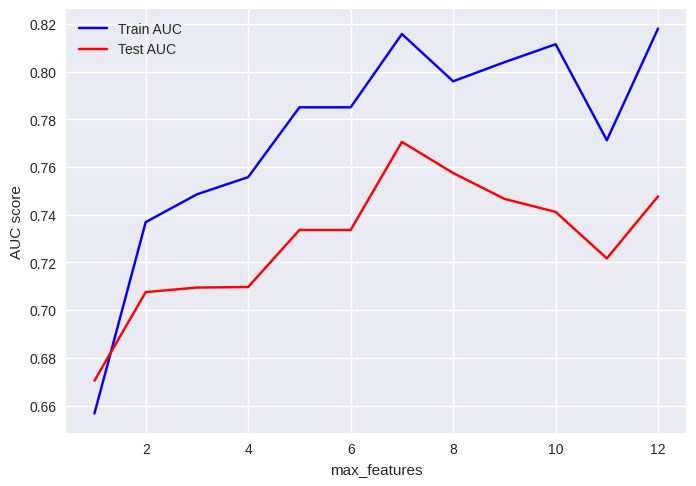

In [13]:
# Find the best value for optimal maximum feature size
max_features_range = range(1, 13)

train_results = []
test_results = []

for max_feature in max_features_range:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=max_feature, random_state=SEED)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    train_results.append(roc_auc_train)
    
    y_pred = dt.predict(X_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    test_results.append(roc_auc_test)

plt.plot(max_features_range, train_results, 'b', label='Train AUC')
plt.plot(max_features_range, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.legend()
plt.show()


# Your observations here
From the plot, we can see that as we increase the maximum number of features considered for each split, the training AUC score improves gradually and stabilizes around a score of 0.98 at a maximum feature size of 6. However, the test AUC score first improves from 0.8 to 0.9 as we increase the maximum number of features and then drops down sharply to around 0.85 as we increase the maximum number of features further.

This suggests that the model is overfitting when considering more than 6 features for each split. Thus, we should choose a maximum feature size of 6 for our decision tree to achieve a good trade-off between underfitting and overfitting.

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [ ]:
# Train a classifier with optimal values identified above
dt = None


false_positive_rate, true_positive_rate, thresholds = None
roc_auc = None
roc_auc

In [ ]:
# Your observations here

In order to address the issue of a baseline classifier performing better than a tuned one like this, a more-sophisticated technique is called a "grid search" and this will be introduced in a future lesson.

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 